In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn



In [3]:
df = pd.read_csv("watson_healthcare_modified.csv", encoding = 'utf-8')
df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [4]:
#above we are unable to see all of the columns so this loc allows us to see all of the columns

pd.options.display.max_columns = 500
df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,3,Male,66,1,1,Nurse,4,Single,2340,23213,1,Y,Yes,18,3,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,3,Female,94,2,3,Nurse,4,Married,9071,11563,2,Y,Yes,19,3,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,4,Female,83,2,1,Other,2,Single,2836,11757,1,Y,No,13,3,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,4,Female,65,2,4,Therapist,4,Married,12742,7060,1,Y,No,16,3,3,80,1,21,3,3,21,6,11,8


#### PREPROCESSING

In [5]:
#In order to assess the data above, we must look for columns that we can drop and do not correlate directly to reaching our goal,
#and we know that attrition column is something that we need in order to train our model, so we must use that and it will needs to
#be transformed into a binary feature. Also just because a feature is numerical doesn't mean it can be used right away. 


#We will binary encode all the necessary features that need it, becuase again our models can only understand 1s and 0s
#Also we will need to one hot encode all the necessary features

#Binary encoding
#Assigns a binary number to each category usually just two, resulting in fewer columns than one-hot encoding. This can help reduce dimensionality and avoid overfitting. However, the columns can be harder to interpret.
#One-hot encoding
#Creates one column for each unique category value, usually more than two, resulting in a sparse matrix witdh many columns. This is preferred when there are a small number of unique categories.


In [6]:
#example of Binary class
df.Gender.value_counts()

Gender
Male      998
Female    678
Name: count, dtype: int64

In [7]:
#example of One-hot encoding
df.BusinessTravel.value_counts()

BusinessTravel
Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: count, dtype: int64

In [8]:
#Binary: Attrition, Gender, Over18, OverTime
df['Attrition'] = df["Attrition"].apply(lambda x: 1 if x == 'Yes' else 0)
df['Gender'] = df["Gender"].apply(lambda x: 1 if x == 'Male' else 0)
df['Over18'] = df["Over18"].apply(lambda x: 1 if x == 'Y' else 0)
df['OverTime'] = df["OverTime"].apply(lambda x: 1 if x == 'Yes' else 0)

df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,0,94,3,2,Nurse,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,1,61,2,2,Other,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,4,1,92,2,1,Nurse,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,0,56,3,1,Other,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,1,1,40,3,1,Nurse,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,3,1,66,1,1,Nurse,4,Single,2340,23213,1,1,1,18,3,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,0,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,3,0,94,2,3,Nurse,4,Married,9071,11563,2,1,1,19,3,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,0,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,4,0,83,2,1,Other,2,Single,2836,11757,1,1,0,13,3,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,0,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,4,0,65,2,4,Therapist,4,Married,12742,7060,1,1,0,16,3,3,80,1,21,3,3,21,6,11,8


In [9]:
#One-Hot Encoding: BusinessTravel, Department, EducationField, JobRole, MaritalStatus
df = df.join(pd.get_dummies(df['BusinessTravel'])).drop('BusinessTravel', axis=1)
df = df.join(pd.get_dummies(df['Department'])).drop('Department', axis=1)
df = df.join(pd.get_dummies(df['EducationField'])).drop('EducationField', axis=1)
df = df.join(pd.get_dummies(df['JobRole'], prefix='Role')).drop('JobRole', axis=1)
df = df.join(pd.get_dummies(df['MaritalStatus'], prefix='status')).drop('MaritalStatus', axis=1)
df

,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Cardiology,Maternity,Neurology,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Role_Admin,Role_Administrative,Role_Nurse,Role_Other,Role_Therapist,status_Divorced,status_Married,status_Single
0,1313919,41,0,1102,1,2,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
1,1200302,49,0,279,8,1,1,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False
2,1060315,37,1,1373,2,2,1,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True
3,1272912,33,0,1392,3,4,1,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False
4,1414939,27,0,591,2,1,1,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,471,24,3,1,3,1,66,1,1,4,2340,23213,1,1,1,18,3,2,80,0,1,3,1,1,0,0,0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True
1672,1152327,46,0,1125,10,3,1,3,0,94,2,3,4,9071,11563,2,1,1,19,3,3,80,1,15,3,3,3,2,1,2,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False
1673,1812428,20,0,959,1,3,1,4,0,83,2,1,2,2836,11757,1,1,0,13,3,4,80,0,1,0,4,1,0,0,0,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
1674,1812429,39,0,466,1,1,1,4,0,65,2,4,4,12742,7060,1,1,0,16,3,3,80,1,21,3,3,21,6,11,8,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False


In [10]:
#We can turn all the Boolean logic into binary aswell 
#what that is saying is that, we need to combine both statements for 1 and 0 so that every other number in that dataset that isn't a 0 orn 1 do not get turned into a 0 or 1
df = df.map(lambda x: 1 if x is True else 0 if x is False else x)
df

,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Cardiology,Maternity,Neurology,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Role_Admin,Role_Administrative,Role_Nurse,Role_Other,Role_Therapist,status_Divorced,status_Married,status_Single
0,1313919,41,0,1102,1,2,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,1200302,49,0,279,8,1,1,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,1060315,37,1,1373,2,2,1,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1272912,33,0,1392,3,4,1,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,1414939,27,0,591,2,1,1,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,471,24,3,1,3,1,66,1,1,4,2340,23213,1,1,1,18,3,2,80,0,1,3,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1672,1152327,46,0,1125,10,3,1,3,0,94,2,3,4,9071,11563,2,1,1,19,3,3,80,1,15,3,3,3,2,1,2,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1673,1812428,20,0,959,1,3,1,4,0,83,2,1,2,2836,11757,1,1,0,13,3,4,80,0,1,0,4,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1674,1812429,39,0,466,1,1,1,4,0,65,2,4,4,12742,7060,1,1,0,16,3,3,80,1,21,3,3,21,6,11,8,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [11]:
print(df.columns)

Index(['EmployeeID', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Non-Travel', 'Travel_Frequently',
       'Travel_Rarely', 'Cardiology', 'Maternity', 'Neurology',
       'Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other',
       'Technical Degree', 'Role_Admin', 'Role_Administrative', 'Role_Nurse',
       'Role_Other', 'Role_Therapist', 'status_Divorced', 'status_Married',
       'status_Single'],
      dtype='object')


In [12]:
df=df.drop('EmployeeID', axis=1)

In [13]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Cardiology,Maternity,Neurology,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Role_Admin,Role_Administrative,Role_Nurse,Role_Other,Role_Therapist,status_Divorced,status_Married,status_Single
0,41,0,1102,1,2,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,49,0,279,8,1,1,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,33,0,1392,3,4,1,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,471,24,3,1,3,1,66,1,1,4,2340,23213,1,1,1,18,3,2,80,0,1,3,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1672,46,0,1125,10,3,1,3,0,94,2,3,4,9071,11563,2,1,1,19,3,3,80,1,15,3,3,3,2,1,2,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1673,20,0,959,1,3,1,4,0,83,2,1,2,2836,11757,1,1,0,13,3,4,80,0,1,0,4,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1674,39,0,466,1,1,1,4,0,65,2,4,4,12742,7060,1,1,0,16,3,3,80,1,21,3,3,21,6,11,8,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0


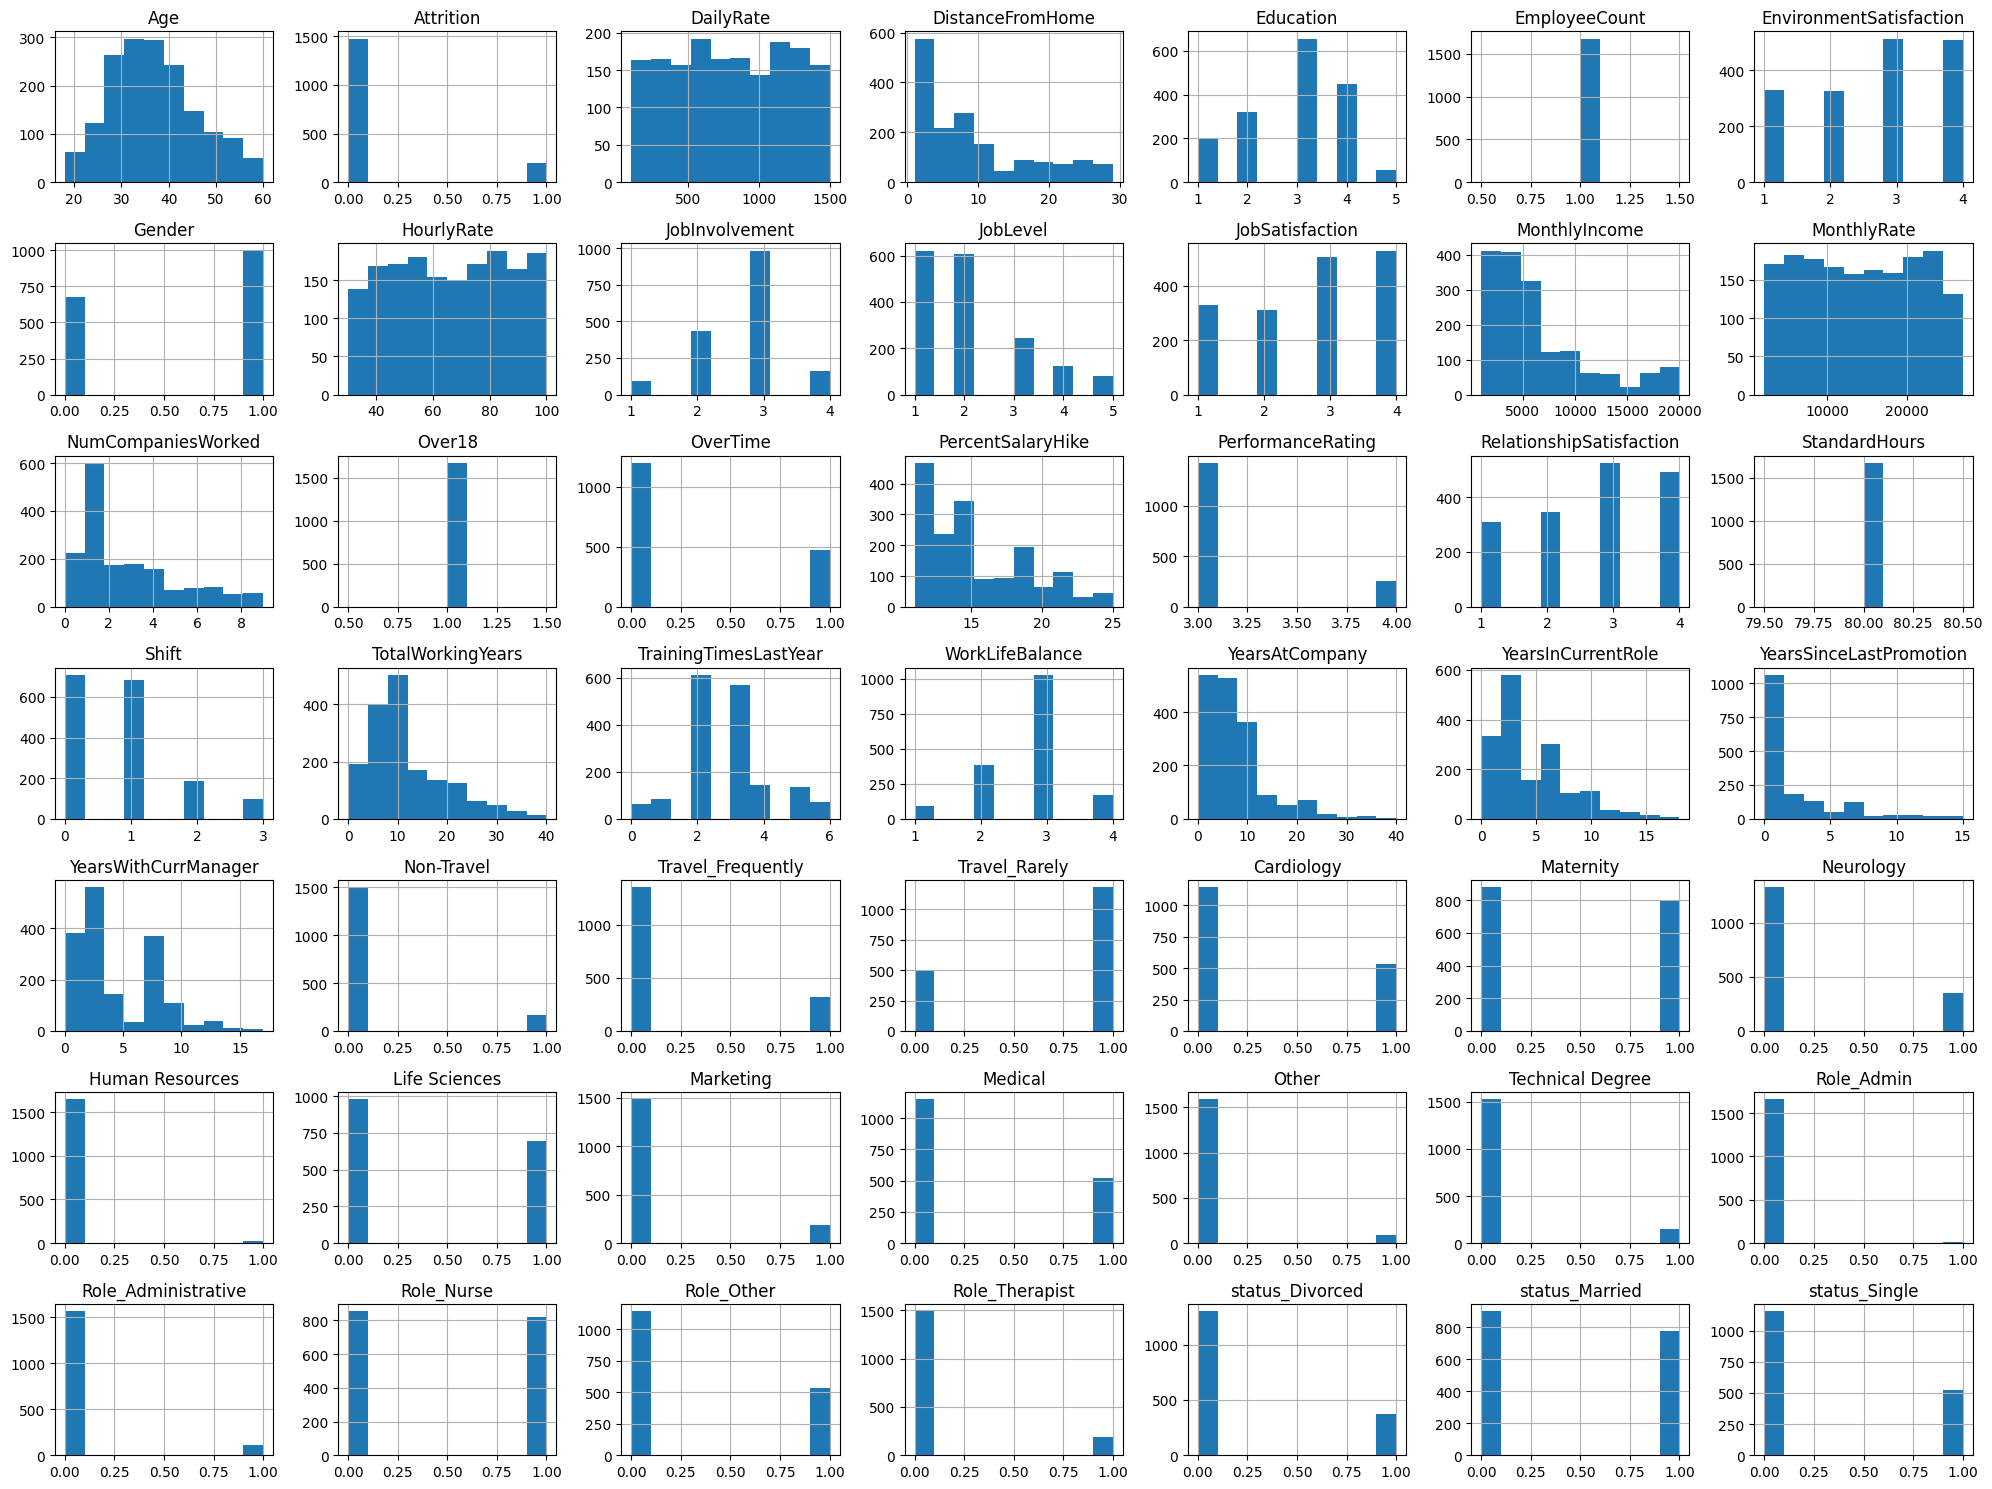

In [14]:
#plot a histogram of the data to see if some features are so skewed that they are useless

import matplotlib.pyplot as plt
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

In [15]:
#As we can see above in the histogram, emplyeecount, over18 and Standardhours only have a single values which makes them irrelevant to our model, also some of thr skewed data may be irrelevant

In [16]:
df = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Cardiology,Maternity,Neurology,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Role_Admin,Role_Administrative,Role_Nurse,Role_Other,Role_Therapist,status_Divorced,status_Married,status_Single
0,41,0,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,471,24,3,3,1,66,1,1,4,2340,23213,1,1,18,3,2,0,1,3,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1672,46,0,1125,10,3,3,0,94,2,3,4,9071,11563,2,1,19,3,3,1,15,3,3,3,2,1,2,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1673,20,0,959,1,3,4,0,83,2,1,2,2836,11757,1,0,13,3,4,0,1,0,4,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1674,39,0,466,1,1,4,0,65,2,4,4,12742,7060,1,0,16,3,3,1,21,3,3,21,6,11,8,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0


##### MODEL TRAINING

In [17]:
#This strucutre is going to be a decision tree structuon and because of this we are going to train a
#random forest classifier because of the structure of it being a yes or a no sequence that leads to attrition or no attrititon


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = df.drop('Attrition', axis=1), df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [19]:
model.score(X_test, y_test)

0.9077380952380952

In [20]:
#Next we want to see what factors are the most important when it comes to the decision making,
#and random forest is pretty good at showing you the feature importances

sorted_importances = dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x:x[1], reverse=True))
sorted_importances

{'OverTime': 0.09651935356708524,
 'Age': 0.07807958062588607,
 'TotalWorkingYears': 0.07264449962151713,
 'MonthlyIncome': 0.06760290143146958,
 'DistanceFromHome': 0.04615208931115579,
 'DailyRate': 0.04478720894334327,
 'HourlyRate': 0.04151190708075943,
 'MonthlyRate': 0.040427211385993735,
 'YearsAtCompany': 0.03676622563421545,
 'JobLevel': 0.03198629725218823,
 'NumCompaniesWorked': 0.027724386301234312,
 'YearsWithCurrManager': 0.026795023861419104,
 'JobInvolvement': 0.026178043136723506,
 'EnvironmentSatisfaction': 0.026124234093963878,
 'YearsInCurrentRole': 0.025481258860280874,
 'PercentSalaryHike': 0.025161871258461355,
 'WorkLifeBalance': 0.024772833757848008,
 'Shift': 0.023516751383953264,
 'status_Single': 0.02078574866603384,
 'TrainingTimesLastYear': 0.019425586057639808,
 'RelationshipSatisfaction': 0.019298452005931784,
 'JobSatisfaction': 0.018511103411825932,
 'Education': 0.016642685115729455,
 'YearsSinceLastPromotion': 0.015491350158866326,
 'Role_Nurse': 0.0

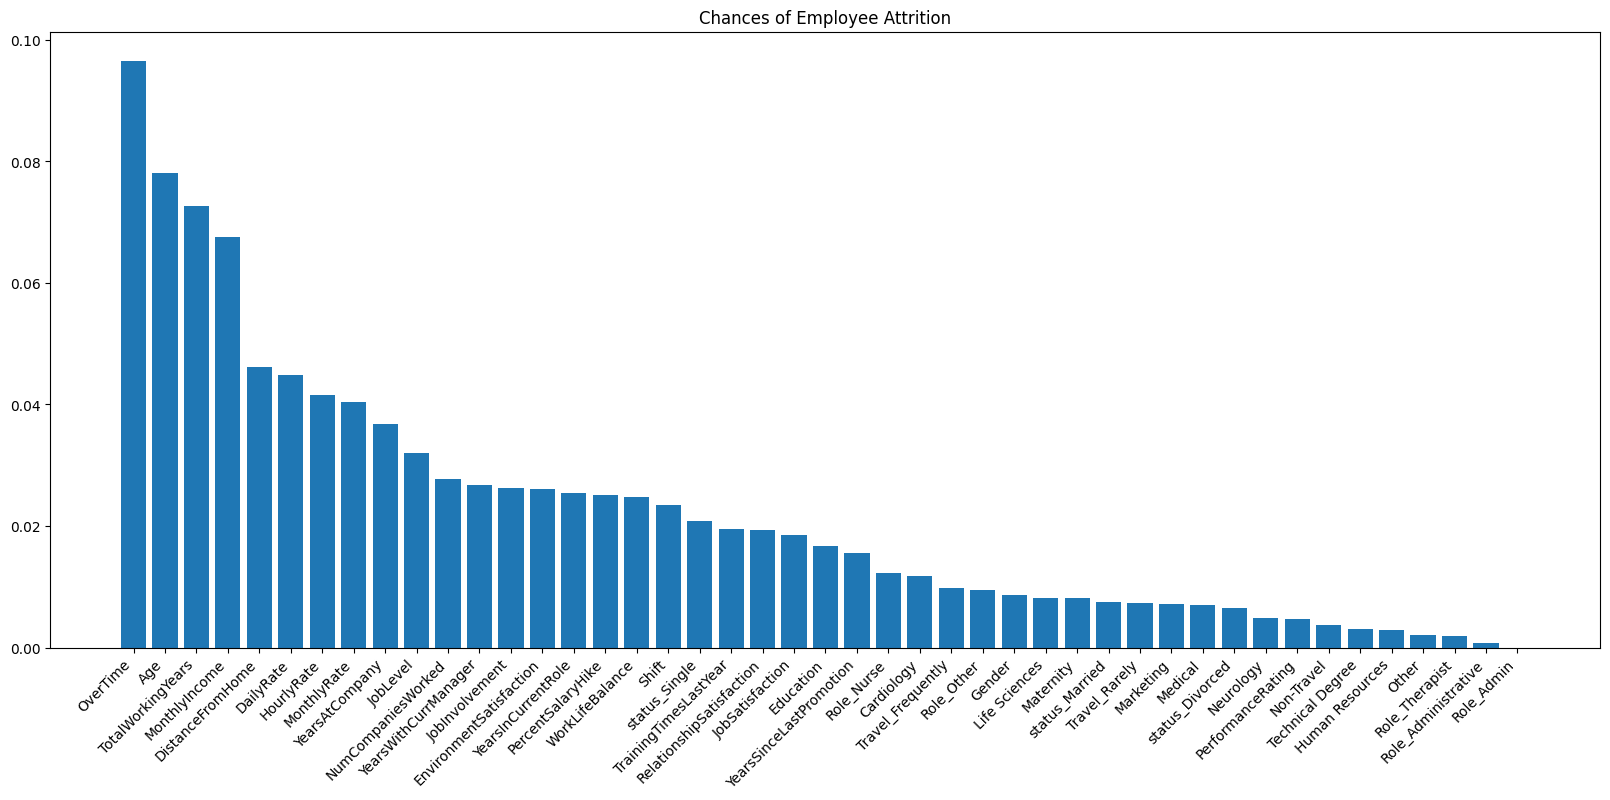

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.bar(sorted_importances.keys(), sorted_importances.values())
plt.title("Chances of Employee Attrition")
plt.xticks(rotation=45, ha="right")
plt.show()